<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Modeling
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
product_df = pd.read_csv('../data/processed/preprocess_QCL.csv')
population_df = pd.read_csv('../data/processed/preprocess_OA.csv')
agri_pop_df = pd.read_csv('../data/processed/preprocess_OEA.csv')
value_df = pd.read_csv('../data/processed/preprocess_QV.csv')

In [3]:
element_df = pd.read_csv('../data/external/element_code.csv')
item_df = pd.read_csv('../data/external/item_code.csv')
indicator_df = pd.read_csv('../data/external/indicator_code.csv')

# Model 02: Rice and Maize's Production Prediction Linear Regression Model
-   Using 6 features: `Rural population (1000 No)`, `Total Population - Both sexes (1000 No)`, `Total Population - Female (1000 No)	`, `Total Population - Male (1000 No)`, `Urban population (1000 No)`, `Area Harvest`

### Pre-process data to use for model 2

In [4]:
population_df = population_df.merge(element_df, how= 'left', on= 'Element Code')
population_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element
0,OA,237,511,3010,1950,1000 No,25109.200,X,NaN,Total Population - Both sexes (1000 No)
1,OA,237,512,3010,1950,1000 No,12408.031,X,NaN,Total Population - Male (1000 No)
2,OA,237,513,3010,1950,1000 No,12701.169,X,NaN,Total Population - Female (1000 No)
3,OA,237,551,3010,1950,1000 No,21921.843,X,NaN,Rural population (1000 No)
4,OA,237,561,3010,1950,1000 No,2888.063,X,NaN,Urban population (1000 No)
...,...,...,...,...,...,...,...,...,...,...
650,OA,237,512,3010,2099,1000 No,46560.058,X,NaN,Total Population - Male (1000 No)
651,OA,237,513,3010,2099,1000 No,44913.397,X,NaN,Total Population - Female (1000 No)
652,OA,237,511,3010,2100,1000 No,91036.732,X,NaN,Total Population - Both sexes (1000 No)
653,OA,237,512,3010,2100,1000 No,46342.743,X,NaN,Total Population - Male (1000 No)


-   As we can see we have 5 kind of data for 1 year in the dataframe, we have to reorganize population_df if we want to use it
-   Solution: change to dataframe with index is each year, 5 columns of 5 different kind of data

In [5]:
population_df = population_df.pivot(index= 'Year', columns= 'Element', values= 'Value').reset_index()
population_df

Element,Year,Rural population (1000 No),Total Population - Both sexes (1000 No),Total Population - Female (1000 No),Total Population - Male (1000 No),Urban population (1000 No)
0,1950,21921.843,25109.200,12701.169,12408.031,2888.063
1,1951,22341.053,25627.533,12986.858,12640.675,3023.400
2,1952,22806.351,26189.593,13294.186,12895.406,3170.487
3,1953,23316.645,26820.851,13635.315,13185.537,3329.527
4,1954,23869.466,27507.453,13996.163,13511.290,3501.236
...,...,...,...,...,...,...
146,2096,NaN,92769.682,45571.738,47197.944,NaN
147,2097,NaN,92339.695,45351.840,46987.855,NaN
148,2098,NaN,91907.988,45132.670,46775.318,NaN
149,2099,NaN,91473.455,44913.397,46560.058,NaN


-   Get data of `Rice` and `Maize (corn)`

In [6]:
raw_data = product_df[product_df['Item Code'].isin([56, 27])] # Get data of Rice and Maize
raw_data

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note
4565,QCL,237,5312,56,1961,ha,260200.00,A,NaN
4566,QCL,237,5419,56,1961,100 g/ha,11230.00,E,NaN
4567,QCL,237,5510,56,1961,t,292200.00,A,NaN
4568,QCL,237,5312,56,1962,ha,262020.00,X,Unofficial figure
4569,QCL,237,5419,56,1962,100 g/ha,11987.00,X,Unofficial figure
...,...,...,...,...,...,...,...,...,...
10162,QCL,237,5419,27,2020,100 g/ha,59212.00,A,NaN
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN
10164,QCL,237,5312,27,2021,ha,7219797.00,A,NaN
10165,QCL,237,5419,27,2021,100 g/ha,60740.00,A,NaN


-   Get the area harvest

In [7]:
area_df = raw_data[raw_data['Element Code'] == 5312]
area_df = area_df.drop(columns=['Domain Code', 'Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Unit', 'Flag', 'Note'])
area_df = area_df.rename(columns={'Value' : 'Area Harvest'})
area_df

,Year,Area Harvest
4565,1961,260200.0
4568,1962,262020.0
4571,1963,272750.0
4574,1964,257000.0
4577,1965,277400.0
...,...,...
10152,2017,7708534.0
10155,2018,7570741.0
10158,2019,7451544.0
10161,2020,7222403.0


-   Merge all the data that we need to one

In [8]:
data = raw_data[raw_data['Element Code'] == 5510]
data = data.merge(population_df, how= 'left', on= 'Year')
data = data.merge(area_df, how= 'left', on= 'Year')

In [9]:
data

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Rural population (1000 No),Total Population - Both sexes (1000 No),Total Population - Female (1000 No),Total Population - Male (1000 No),Urban population (1000 No),Area Harvest
0,QCL,237,5510,56,1961,t,292200.00,A,NaN,28606.192,33621.982,17086.013,16535.970,5060.580,260200.0
1,QCL,237,5510,56,1961,t,292200.00,A,NaN,28606.192,33621.982,17086.013,16535.970,5060.580,4744000.0
2,QCL,237,5510,56,1962,t,314085.00,X,Unofficial figure,29353.433,34533.889,17548.591,16985.297,5330.732,262020.0
3,QCL,237,5510,56,1962,t,314085.00,X,Unofficial figure,29353.433,34533.889,17548.591,16985.297,5330.732,4888860.0
4,QCL,237,5510,56,1963,t,253840.00,X,Unofficial figure,30108.893,35526.727,18053.403,17473.324,5613.198,272750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,QCL,237,5510,27,2019,t,43495487.58,A,NaN,61742.331,95776.716,48488.283,47288.433,35686.730,7451544.0
240,QCL,237,5510,27,2020,t,42764999.76,A,NaN,61632.897,96648.685,48922.527,47726.158,36727.248,939563.0
241,QCL,237,5510,27,2020,t,42764999.76,A,NaN,61632.897,96648.685,48922.527,47726.158,36727.248,7222403.0
242,QCL,237,5510,27,2021,t,43852728.69,A,NaN,61504.284,97468.029,49331.842,48136.186,37779.862,900673.0


### Choose features to train

In [10]:
def get_data(data, itemCode):

    ratio = [0.6, 0.3, 0.1] #ratio for train, validation, and test
    data = data[data['Item Code'] == itemCode]
    data = data.sample(frac= 1)

    data = data.drop(columns= ['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year', 'Unit', 'Year', 'Flag', 'Note'])

    data_train = data.iloc[:int(ratio[0]*len(data)), :]
    data_validation = data.iloc[int(ratio[0]*len(data)) : (int(ratio[0]*len(data)) + int(ratio[1]*len(data))), :]
    data_test =  data.iloc[(int(ratio[0]*len(data)) + int(ratio[1]*len(data))) :, :]

    X_train = data_train.iloc[:, 1:]
    y_train = data_train.iloc[:, :-5]

    X_validation = data_validation.iloc[:, 1:]
    y_validation = data_validation.iloc[:, :-5]

    X_test = data_test.iloc[:, 1:]
    y_test = data_test.iloc[:, :-5]

    return X_train, y_train, X_validation, y_validation, X_test, y_test


-   Split data to 3 set for train, validate, and test (with ratio of 6:3:1)

In [11]:
def main_model_2(itemCode):
    X_train, y_train, X_validation, y_validation,  X_test, y_test = get_data(data, itemCode)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    print("Coefficient of determination of the prediction on Validation set", lr.score(X_validation, y_validation))

    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred= y_pred)
    return mae


-   Now let run it 20 times

In [12]:
history_maize = {}
history_rice = {}

# corn first
for epoch in range(20):
    test_mae = main_model_2(56)
    history_maize[epoch] = {test_mae}

    print('Epoch', epoch + 1)
    print('-------------------------------')
    print('Testing MAE:', test_mae, '\n')

# Rice second
for epoch in range(20):
    test_mae = main_model_2(27)
    history_rice[epoch] = {test_mae}

    print('Epoch', epoch + 1)
    print('-------------------------------')
    print('Testing MAE:', test_mae, '\n')

Coefficient of determination of the prediction on Validation set 0.9818312427008894
Epoch 1
-------------------------------
Testing MAE: 158610.03134671706 

Coefficient of determination of the prediction on Validation set 0.9864899340248847
Epoch 2
-------------------------------
Testing MAE: 127734.44299894103 

Coefficient of determination of the prediction on Validation set 0.9840221007440191
Epoch 3
-------------------------------
Testing MAE: 123239.72980045747 

Coefficient of determination of the prediction on Validation set 0.9850670155292129
Epoch 4
-------------------------------
Testing MAE: 150233.52890231714 

Coefficient of determination of the prediction on Validation set 0.9813822220782349
Epoch 5
-------------------------------
Testing MAE: 148076.537026833 

Coefficient of determination of the prediction on Validation set 0.9689697649142419
Epoch 6
-------------------------------
Testing MAE: 164056.6794158307 

Coefficient of determination of the prediction on Valid

In [13]:
data_corn = pd.DataFrame.from_dict(history_maize, orient= 'index')
data_corn = data_corn.rename(columns= {0 : 'MAE (corn)'})

data_rice = pd.DataFrame.from_dict(history_rice, orient= 'index')
data_rice = data_rice.rename(columns= {0 : 'MAE (rice)'})

In [14]:
visual_data = pd.concat([data_corn, data_rice], axis= 1)
visual_data

,MAE (corn),MAE (rice)
0,158610.031347,899930.098070
1,127734.442999,541989.059591
2,123239.729800,581622.958875
3,150233.528902,933063.684899
4,148076.537027,614297.309841
5,164056.679416,742400.025823
6,124969.582040,681470.645531
7,145049.045290,794677.655326
8,138432.696573,507343.893702
9,136506.128711,798471.028800


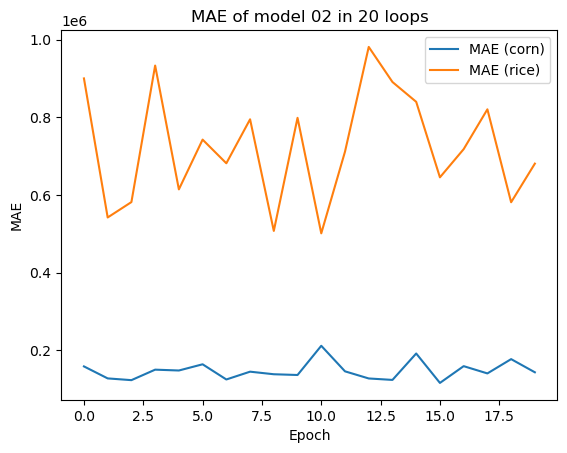

In [15]:
visual_data.plot()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE of model 02 in 20 loops')
plt.show()

### Comment
-   The prediction of corn always lower than 200,000
-   The prediction of Rice always higher than 400,000 and peak at more than 1,000,000
-   The prediction of corn has a lower MAE than Rice in 20 runs.

With the functions we defined above, we shall make the Model 01

### Model 01: Rice and Maize's Production Prediction Linear Production Model

### Step 1: Data preprocessing

In [41]:
temp=product_df.append(value_df)
model=pd.merge(temp, element_df, how="left", on="Element Code")
model=pd.merge(model, item_df, how="left", on="Item Code")
model=model[model["Item"].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][model['Value']!=0]

model=pd.pivot_table(model, values="Value", index=["Item Code", "Year"], columns="Element").reset_index()

C:\Users\admind\AppData\Local\Temp\ipykernel_13672\871555008.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp=product_df.append(value_df)
C:\Users\admind\AppData\Local\Temp\ipykernel_13672\871555008.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model=model[model["Item"].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][model['Value']!=0]


Element,Item Code,Year,Area harvested (ha),Gross Production Value (constant 2014-2016 thousand I$) (1000 Int. $),Gross Production Value (constant 2014-2016 thousand SLC) (1000 SLC),Gross Production Value (constant 2014-2016 thousand US$) (1000 USD),Gross Production Value (current thousand SLC) (1000 SLC),Gross Production Value (current thousand US$) (1000 USD),Production (t),Yield (100 g/ha)
0,27,1961,4744000.0,3518609.0,5.703452e+10,2642279.0,NaN,NaN,8997400.00,18966.0
1,27,1962,4888860.0,3811771.0,6.178649e+10,2862426.0,NaN,NaN,9747040.00,19937.0
2,27,1963,4496520.0,3763133.0,6.099811e+10,2825903.0,NaN,NaN,9622670.00,21400.0
3,27,1964,4987800.0,3792213.0,6.146947e+10,2847740.0,NaN,NaN,9697030.00,19441.0
4,27,1965,4826300.0,3664204.0,5.939453e+10,2751612.0,NaN,NaN,9369700.00,19414.0
...,...,...,...,...,...,...,...,...,...,...
140,79,2017,2160.0,1131.0,1.186664e+08,5472.0,188514960.0,8427.0,3770.30,17452.0
141,79,2018,1862.0,1011.0,1.060547e+08,4890.0,172423225.0,7629.0,3369.60,18101.0
142,79,2019,1566.0,1169.0,1.226059e+08,5653.0,167415753.0,7263.0,3895.46,24869.0
143,79,2020,1380.0,615.0,6.452670e+07,2975.0,86106677.0,3710.0,2050.16,14861.0


### Step 2: Select Features to be trained

In [78]:

def model_select(model, itemCode):
    ratio = [0.5, 0.3, 0.2] #ratio for train, validation, and test
    model = model[model['Item Code'] == itemCode]
    model = model.sample(frac= 1)

    model_train = model.iloc[:int(ratio[0]*len(model)), :]
    model_validation = model.iloc[int(ratio[0]*len(model)) : (int(ratio[0]*len(model)) + int(ratio[1]*len(model))), :]
    model_test =  model.iloc[(int(ratio[0]*len(model)) + int(ratio[1]*len(model))) :, :]



    X_train = model_train.iloc[:, [2, 4, 5, 9]]
    y_train = model_train.iloc[:, 5]

    X_validation = model_validation.iloc[:, [2, 4, 5, 9]]
    y_validation = model_validation.iloc[:, 5]

    X_test = model_test.iloc[:, [2, 4, 5, 9]]
    y_test = model_test.iloc[:, 8]
    y_test
    
    return X_train, y_train, X_validation, y_validation, X_test, y_test


### Step 3: Initiate Training

In [81]:
def train_model01(itemCode):
    X_train, y_train, X_validation, y_validation, X_test, y_test=model_select(model, 56)

    regression=LinearRegression()
    regression.fit(X_train, y_train)

    print("Model Coefficience: ", regression.score(X_validation, y_validation))

    y_predict=regression.predict(X_test)

    return(mean_absolute_error(y_true=y_test, y_pred=y_predict))

Rice:
Model Coefficience:  1.0
Epoch 1
~~--~~  
MAE value: 991727.6284615385 

Model Coefficience:  1.0
Epoch 2
~~--~~  
MAE value: 1437779.0323076923 

Model Coefficience:  1.0
Epoch 3
~~--~~  
MAE value: 542668.2307692308 

Model Coefficience:  1.0
Epoch 4
~~--~~  
MAE value: 1896971.527692308 

Model Coefficience:  1.0
Epoch 5
~~--~~  
MAE value: 1262809.9046153845 

Model Coefficience:  1.0
Epoch 6
~~--~~  
MAE value: 721245.6153846155 

Model Coefficience:  1.0
Epoch 7
~~--~~  
MAE value: 1241879.8599999999 

Model Coefficience:  1.0
Epoch 8
~~--~~  
MAE value: 1297667.5592307693 

Model Coefficience:  1.0
Epoch 9
~~--~~  
MAE value: 1214727.296923077 

Model Coefficience:  1.0
Epoch 10
~~--~~  
MAE value: 1093891.6276923078 

Model Coefficience:  1.0
Epoch 11
~~--~~  
MAE value: 1442834.0361538464 

Model Coefficience:  1.0
Epoch 12
~~--~~  
MAE value: 1331609.583076923 

Model Coefficience:  1.0
Epoch 13
~~--~~  
MAE value: 1431659.7492307695 

Model Coefficience:  1.0
Epoch 14


,Rice MAE,Maize MAE
0,9.917276e+05,8.303219e+05
1,1.437779e+06,1.136489e+06
2,5.426682e+05,1.168264e+06
3,1.896972e+06,1.281542e+06
4,1.262810e+06,1.000875e+06
5,7.212456e+05,1.354324e+06
6,1.241880e+06,1.198119e+06
7,1.297668e+06,2.052492e+06
8,1.214727e+06,1.044620e+06
9,1.093892e+06,1.965919e+06


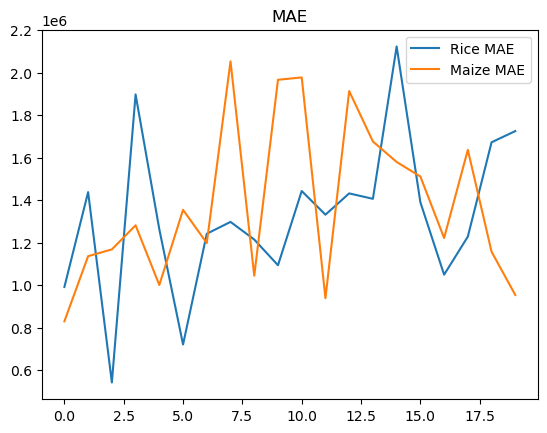

In [84]:
maize=[]
rice=[]

epoch=20
print("Rice:")
for i in range(epoch):
    mae_result=train_model01(27)
    rice.append(mae_result)
    print("Epoch", i+1)
    print("~~--~~  ")
    print("MAE value:", mae_result, "\n")

print("Maize:")
for i in range(epoch):
    mae_result=train_model01(56)
    maize.append(mae_result)
    print("Epoch", i+1)
    print("~~--~~  ")
    print("MAE value:", mae_result, "\n")

df=pd.DataFrame()

df["Rice MAE"]=rice
df["Maize MAE"]=maize

plot=df.plot(title="MAE")

df

### Comment
-   The prediction of Corn is always higher than 2e+06 and peaks at 2.08e+06
-   The prediction of Rice is always lower than 2.2e+06 peaks at 2.18e+06
-   Approximately half of the time, the prediction of corn is higher than rice, and on the other half, the prediction of rice is higher